In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import sklearn.compose
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from scipy.sparse import csr_matrix, issparse
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split
import pickle

In [2]:
df = pd.read_csv('test.csv')

In [3]:
df

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [4]:
df.shape

(2077964, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [6]:
df.describe()

,id,cap-diameter,stem-height,stem-width
count,2.077964e+06,2.077957e+06,2.077963e+06,2.077964e+06
mean,4.155926e+06,6.306192e+00,6.346509e+00,1.114837e+01
std,5.998567e+05,4.685462e+00,2.698978e+00,8.100181e+00
min,3.116945e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636436e+06,3.310000e+00,4.670000e+00,4.970000e+00
50%,4.155926e+06,5.740000e+00,5.880000e+00,9.640000e+00
75%,4.675417e+06,8.230000e+00,7.410000e+00,1.562000e+01
max,5.194908e+06,6.070000e+02,5.729000e+01,1.029100e+02


In [7]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2077959    False
2077960    False
2077961    False
2077962    False
2077963    False
Length: 2077964, dtype: bool

In [8]:
df.isnull().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

<Axes: >

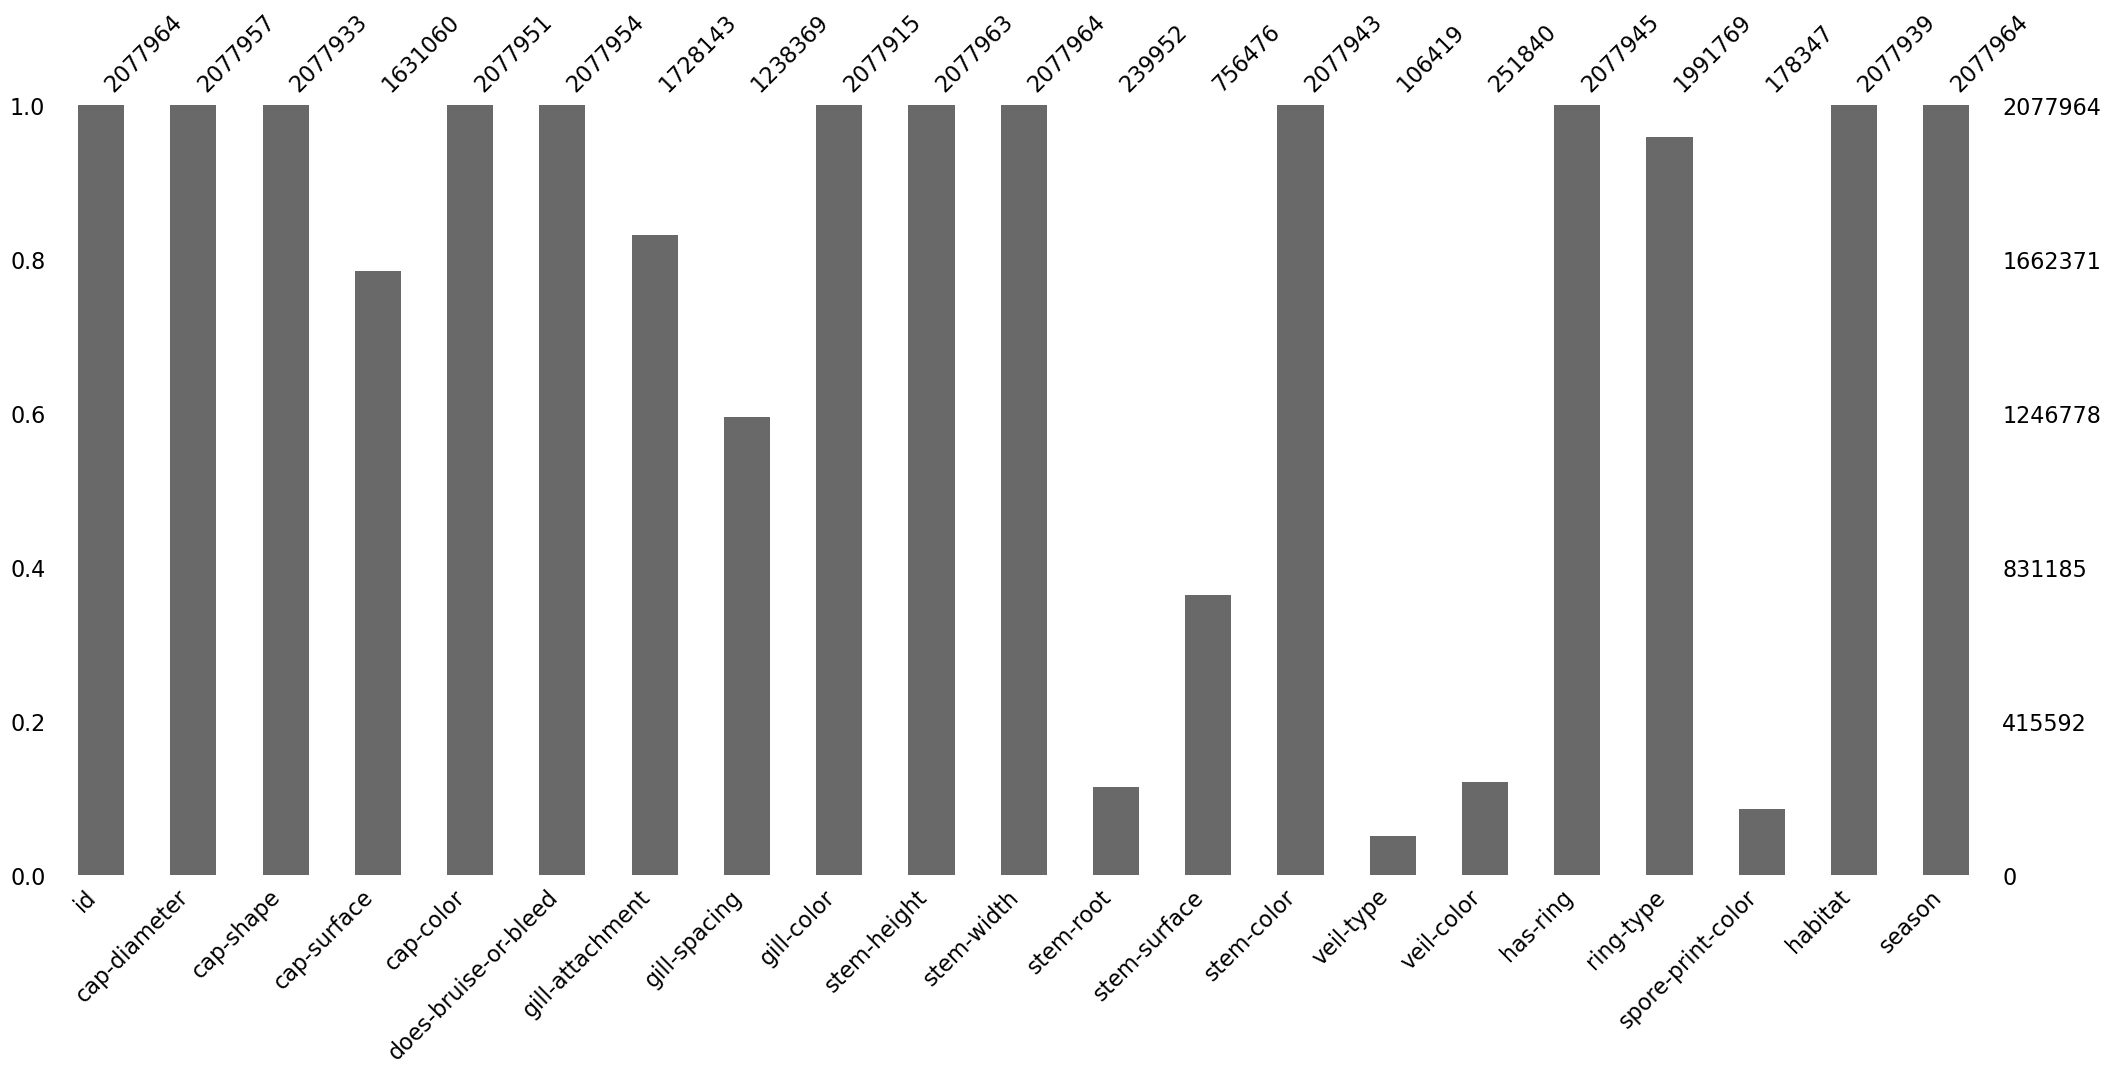

In [9]:
msno.bar(df)

In [10]:
df1 = df.copy()

In [11]:
df1.head(5)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [12]:
df1 = df1.drop(columns = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'])

In [13]:
df1.shape

(2077964, 16)

In [14]:
df1['cap-diameter'] = df1['cap-diameter'].fillna(df1['cap-diameter'].mean())

In [15]:
df1['cap-diameter'].max()

607.0

In [16]:
df1.groupby(['cap-diameter'], as_index = False)[['id']].count()

,cap-diameter,id
0,0.00,2
1,0.02,1
2,0.03,2
3,0.40,4
4,0.44,7
...,...,...
3741,62.34,2
3742,64.72,1
3743,68.00,1
3744,73.36,1


In [17]:
df1['cap-diameter'] = df1['cap-diameter'].replace({607: 73.76})

In [18]:
df1['cap-diameter'].max()

73.76

In [19]:
stats_g_a= df1.groupby(['gill-attachment'], as_index = False)[['id']].count()
stats_g_a = stats_g_a.rename(columns = {'id': 'count'})
stats_g_a.sort_values(by = 'count', ascending=False)

,gill-attachment,count
37,a,430960
41,d,392584
63,x,240758
42,e,201276
57,s,196279
...,...,...
27,29.82,1
28,3.7,1
29,4.8,1
30,6.11,1


In [20]:
df1['gill-attachment'].unique()

array([nan, 's', 'p', 'x', 'f', 'a', 'd', 'e', 'c', 't', 'i', 'u',
       '13.42', 'k', '6.24', 'n', 'w', 'm', 'class', 'z', 'l', '8.33',
       'b', 'o', 'g', '2.75', '0.95', 'r', 'season', 'spore-print-color',
       '1.75', 'y', 'h', '3.7', '23.73', '1.58', '1.32', '12.22', '6.35',
       '17.77', '1.26', '7.18', '8.21', '2.51', '6.11', '17.11', '10.62',
       '0.93', '25.92', '4.8', 'e s', '29.82', '1.56', '8.1', '0.88',
       '11.8', '17.97', '12.99', '23.18', '22.33', '2.86', 'has-ring',
       '1.83', '0.87', '2.17', '2.82', 'is None'], dtype=object)

In [21]:
df1['gill-attachment'] = df1['gill-attachment'].fillna('a')

In [22]:
def gill_attachment(df):
    df1['gill_attachment'] = 'a'
    
    gill_att = ['a', 's', 'p', 'x', 'f', 'd', 'e', 'c', 't', 'i', 'u',
       'k', 'n', 'w', 'm', 'z', 'l', 'b', 'o','g','r','y', 'h',]
    
    for gill in gill_att:
        df1.loc[df1['gill-attachment'] == gill, 'gill_attachment'] = gill
    return df

In [23]:
gill_attachment(df1)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,gill_attachment
0,3116945,8.64,x,NaN,n,t,a,NaN,w,11.13,17.12,w,t,g,d,a,a
1,3116946,6.90,o,t,o,f,a,c,y,1.27,10.75,n,f,f,d,a,a
2,3116947,2.00,b,g,n,f,a,c,n,6.18,3.14,n,f,f,d,s,a
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u,s
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u,a
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a,d
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a,a


In [24]:
df1['gill_attachment'].unique()

array(['a', 's', 'p', 'x', 'f', 'd', 'e', 'c', 't', 'i', 'u', 'k', 'n',
       'w', 'm', 'z', 'l', 'b', 'o', 'g', 'r', 'y', 'h'], dtype=object)

In [25]:
df2=df1.copy()

In [26]:
stats_c_s = df2.groupby(['cap-surface'], as_index = False)[['id']].count()
stats_c_s = stats_c_s.rename(columns = {'id': 'count'})
stats_c_s.sort_values(by = 'count', ascending=False)

,cap-surface,count
53,t,306852
50,s,257190
57,y,218336
39,h,189737
38,g,176140
34,d,137675
43,k,86041
36,e,79918
42,i,75570
55,w,73109


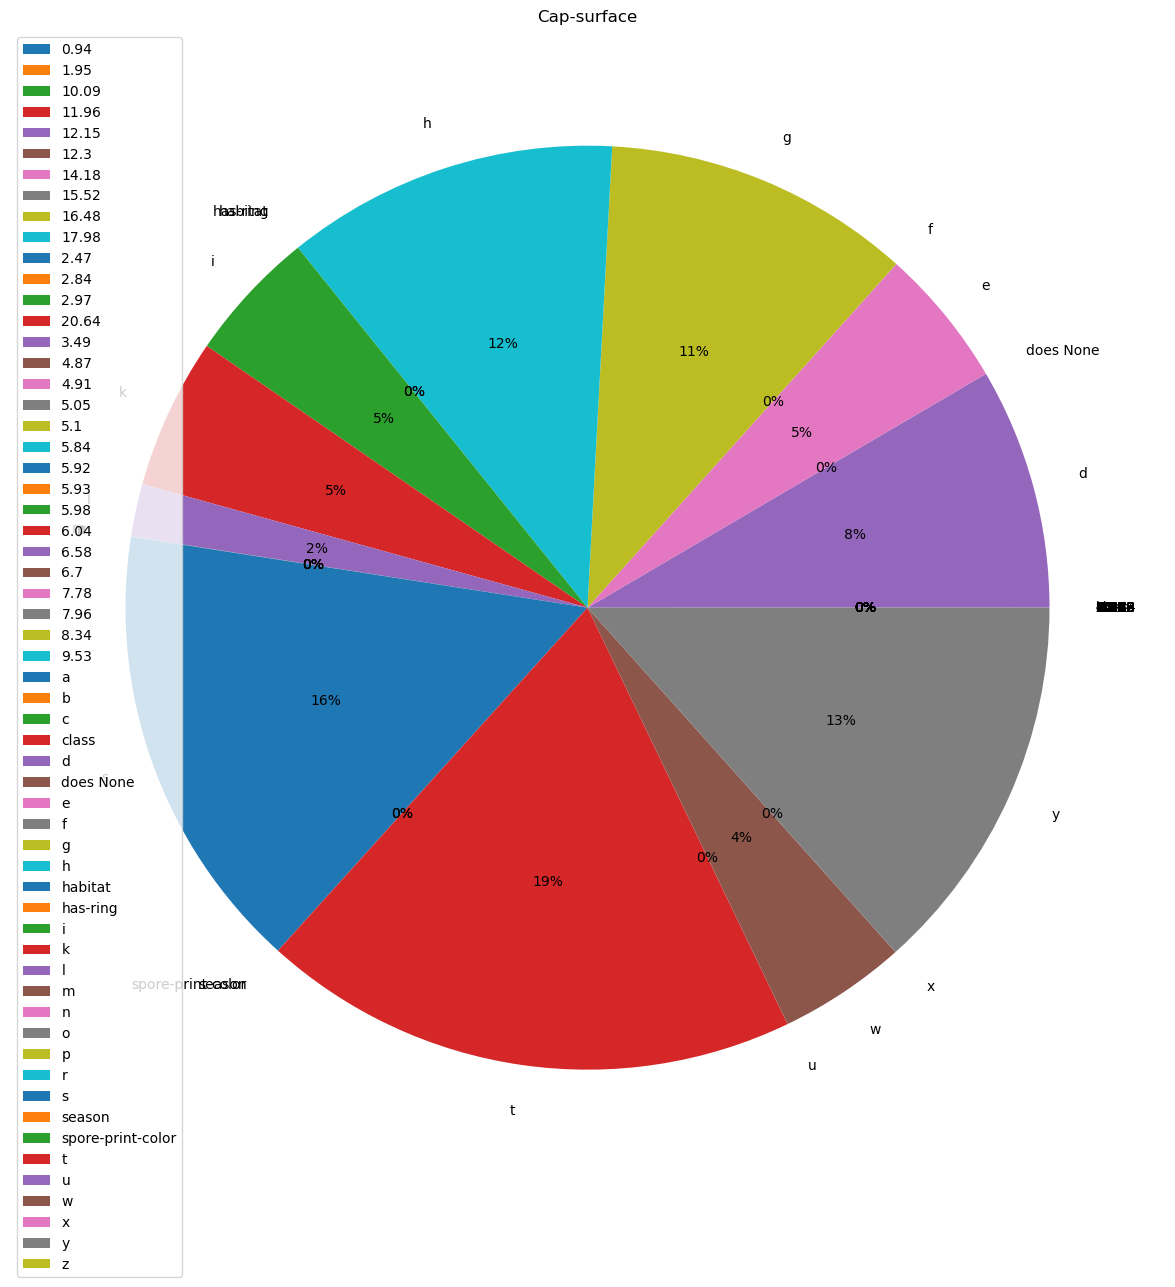

In [27]:
plt.figure(figsize=(24, 15))
plt.pie(stats_c_s['count'], labels=stats_c_s['cap-surface'], autopct='%1.0f%%')
plt.title('Cap-surface')
plt.legend()

plt.show()

In [28]:
df2['cap-surface'] = df2['cap-surface'].fillna('t')

In [29]:
df2['cap-surface'].unique()

array(['t', 'g', 'h', 'd', 'e', 'y', 'k', 's', 'i', 'l', 'w', 'r', 'f',
       'o', 'm', 'a', 'n', 'p', 'b', 'x', 'season', 'u', '6.04', 'z',
       '10.09', 'spore-print-color', 'c', '2.97', 'class', '7.78', '5.05',
       '5.92', '5.98', '11.96', '7.96', '9.53', '17.98', 'habitat',
       '2.47', '20.64', '8.34', 'has-ring', 'does None', '1.95', '16.48',
       '5.84', '5.93', '12.3', '14.18', '4.87', '15.52', '3.49', '6.58',
       '12.15', '6.7', '4.91', '0.94', '2.84', '5.1'], dtype=object)

In [30]:
def cap_surface(df):
    df2['cap_surface'] = 't'
    
    cap_s = ['t', 'g', 'h', 'd', 'e', 'y', 'k', 's', 'i', 'l', 'w', 'r', 'f',
       'o', 'm', 'a', 'n', 'p', 'b', 'x', 'u', 'z', 'c']
    for cap in cap_s:
        df2.loc[df2['cap-surface'] == cap, 'cap_surface'] = cap
    return df

In [31]:
cap_surface(df2)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,gill_attachment,cap_surface
0,3116945,8.64,x,t,n,t,a,NaN,w,11.13,17.12,w,t,g,d,a,a,t
1,3116946,6.90,o,t,o,f,a,c,y,1.27,10.75,n,f,f,d,a,a,t
2,3116947,2.00,b,g,n,f,a,c,n,6.18,3.14,n,f,f,d,s,a,g
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u,s,t
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u,p,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u,a,g
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a,d,s
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a,a,e
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a,a,g


In [32]:
df2['cap_surface'].unique()

array(['t', 'g', 'h', 'd', 'e', 'y', 'k', 's', 'i', 'l', 'w', 'r', 'f',
       'o', 'm', 'a', 'n', 'p', 'b', 'x', 'u', 'z', 'c'], dtype=object)

In [33]:
df2.shape

(2077964, 18)

<Axes: >

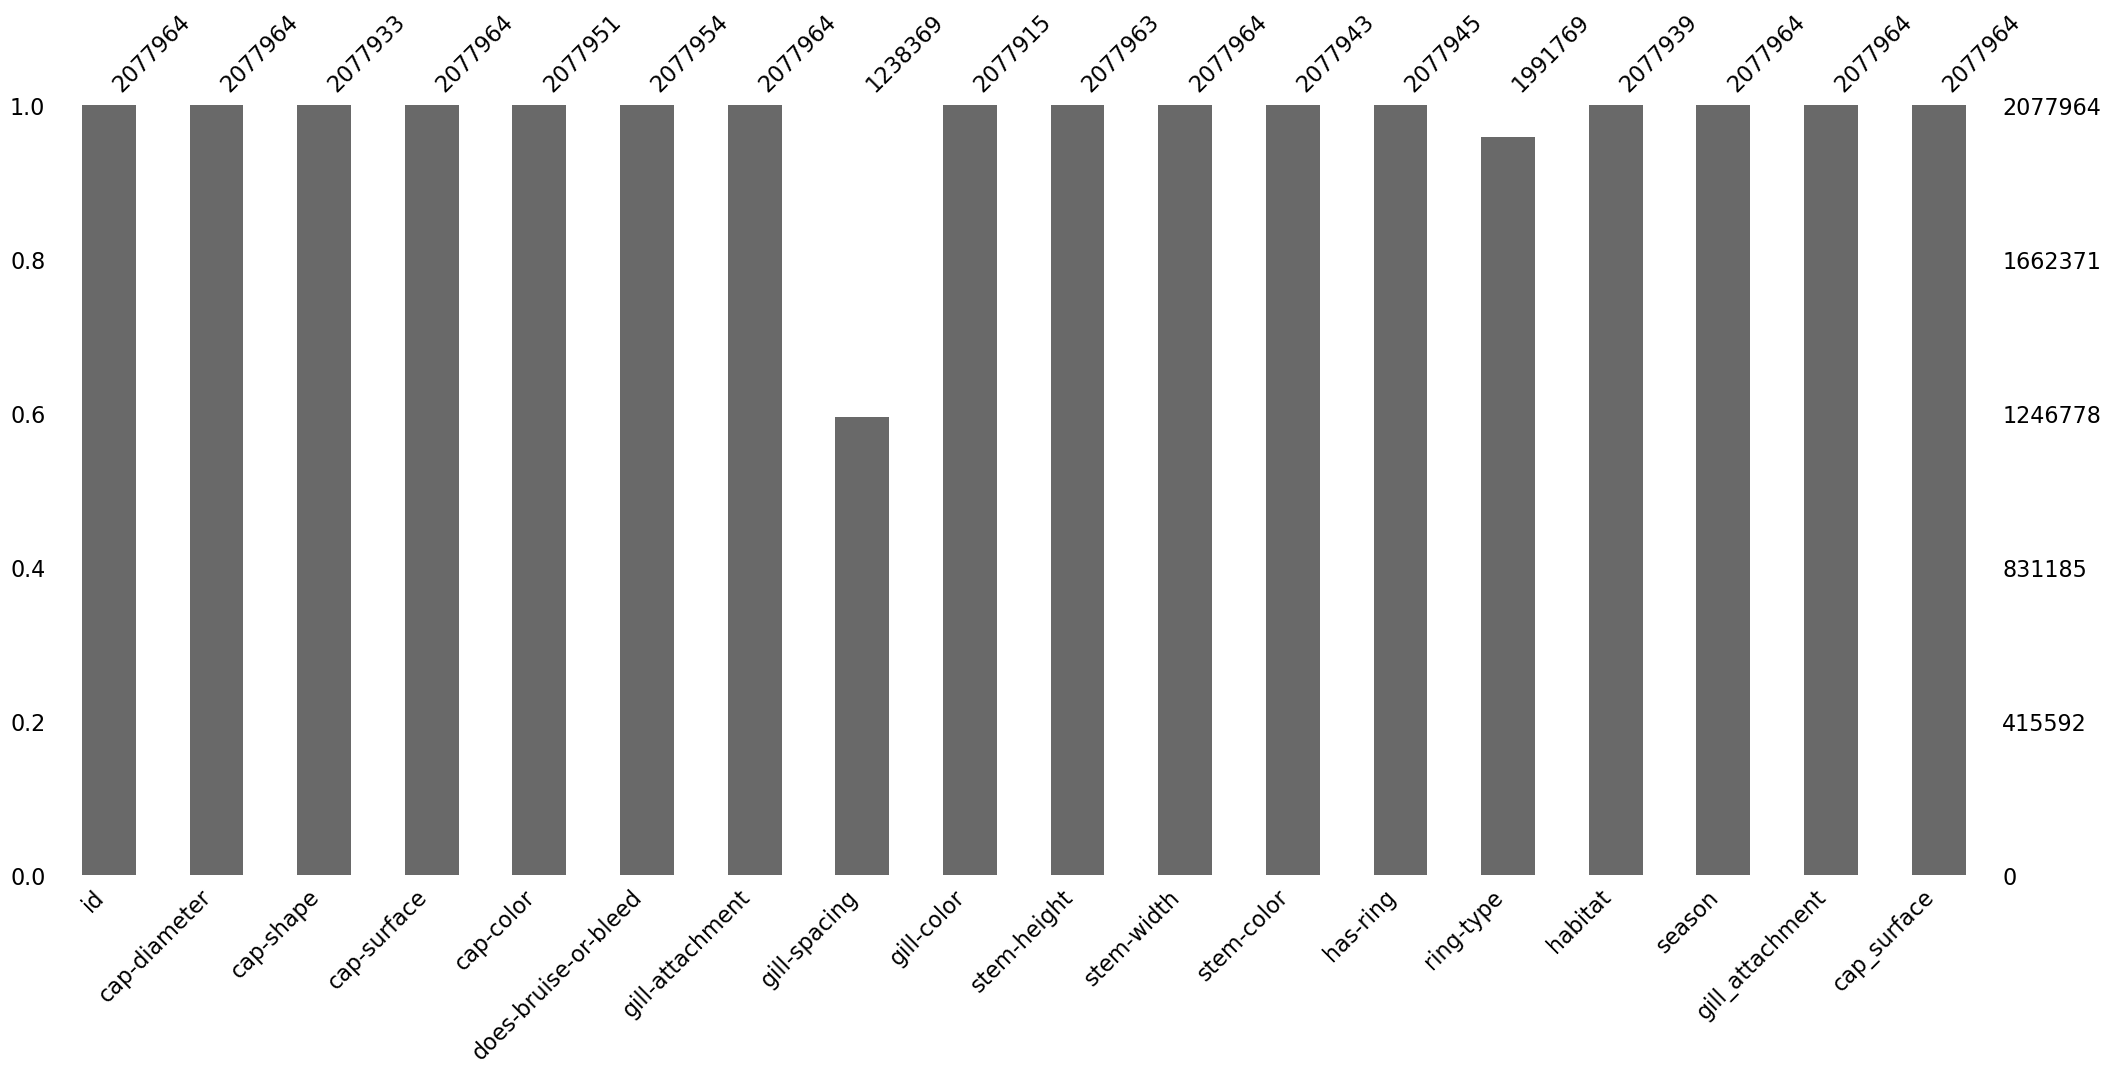

In [34]:
msno.bar(df2)

In [35]:
stats_c_sh = df2.groupby(['cap-shape'], as_index = False)[['id']].count()
stats_c_sh = stats_c_sh.rename(columns = {'id': 'count'})
stats_c_sh.sort_values(by = 'count', ascending=False)

,cap-shape,count
59,x,957949
41,f,452360
55,s,242698
36,b,211879
50,o,71972
...,...,...
25,51.63,1
26,6,1
27,6.15,1
28,6.47,1


In [36]:
df2['cap-shape'] = df2['cap-shape'].fillna('x')

In [37]:
df2['cap-shape'].unique()

array(['x', 'o', 'b', 'f', 's', 'p', 'c', 'g', 't', 'i', 'a', 'n', '7.21',
       'e', 'w', 'd', 'k', 'u', 'y', '3.34', '8.3', 'r', 'l', '3.32',
       '19.76', 'is f', '0.93', '5 f', 'z', 'p f', 'h', '1.25', 'm',
       '4.55', 'ring-type', '11.43', '6', '5.59', '4.41', '3.73', '3.47',
       '6.75', '51.63', '6.52', '9.49', '2.7', '3.15', '5.05',
       'cap-diameter', '4.51', '4.86', '0.97', '3.94', '6.47', '3.23',
       '2.02', '1.53', '8', '6.15', '17.89', '0.74', '4.54'], dtype=object)

In [38]:
def cap_shape(df):
    df2['cap_shape'] = 'x'
    
    cap_sh = ['t', 'g', 'h', 'd', 'e', 'y', 'k', 's', 'i', 'l', 'w', 'r', 'f',
       'o', 'm', 'a', 'n', 'p', 'b', 'x', 'u', 'z', 'c']
    for caps in cap_sh:
        df2.loc[df2['cap-shape'] == caps, 'cap_shape'] = caps
    return df

In [39]:
cap_shape(df2)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape
0,3116945,8.64,x,t,n,t,a,NaN,w,11.13,17.12,w,t,g,d,a,a,t,x
1,3116946,6.90,o,t,o,f,a,c,y,1.27,10.75,n,f,f,d,a,a,t,o
2,3116947,2.00,b,g,n,f,a,c,n,6.18,3.14,n,f,f,d,s,a,g,b
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u,s,t,x
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u,p,h,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u,a,g,x
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a,d,s,x
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a,a,e,x
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a,a,g,b


In [40]:
df2['cap_shape'].unique()

array(['x', 'o', 'b', 'f', 's', 'p', 'c', 'g', 't', 'i', 'a', 'n', 'e',
       'w', 'd', 'k', 'u', 'y', 'r', 'l', 'z', 'h', 'm'], dtype=object)

In [41]:
df3 = df2.copy()

In [42]:
stats_c_c = df3.groupby(['cap-color'], as_index = False)[['id']].count()
stats_c_c = stats_c_c.rename(columns = {'id': 'count'})
stats_c_c.sort_values(by = 'count', ascending=False)

,cap-color,count
44,n,904307
55,y,259062
53,w,253844
36,g,140681
34,e,131524
45,o,119764
46,p,61186
47,r,51784
52,u,48865
29,b,40790


In [43]:
df3['cap-color'] = df3['cap-color'].fillna('n')

In [44]:
df3['cap-color'].unique()

array(['n', 'o', 'y', 'k', 'b', 'w', 'e', 'g', 'p', 'u', 'l', 'r', 'z',
       'f', 's', 'd', 'i', '10.93', 'ring-type', 'a', 'x', '0.73', 'c',
       't', '19.18', 'h', '5.35', 'm', '21.38', 'has-ring', '5.38',
       'class', '7.41', '18.49', 'habitat', '5.16', '4.5', '4.75',
       '17.01', '3.0', '24.74', '12.91', '4.11', '4.92', '10.83', '1.83',
       '2.51', '6.74', '4.18', '23.96',
       'cap---------------------------------------------------------------------------------root',
       '4.96', '0.91', 'season', '6.18', '4.61', '9.19'], dtype=object)

In [45]:
def cap_color(df):
    df3['cap_color'] = 'n'
    
    cap_cl = ['n', 'o', 'y', 'k', 'b', 'w', 'e', 'g', 'p', 'u', 'l', 'r', 'z',
              'f', 's', 'd', 'i', 'a', 'x','c','t', 'h', 'm']
    for capc in cap_cl:
        df3.loc[df3['cap-color'] == capc, 'cap_color'] = capc
    return df

In [46]:
cap_color(df3)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color
0,3116945,8.64,x,t,n,t,a,NaN,w,11.13,17.12,w,t,g,d,a,a,t,x,n
1,3116946,6.90,o,t,o,f,a,c,y,1.27,10.75,n,f,f,d,a,a,t,o,o
2,3116947,2.00,b,g,n,f,a,c,n,6.18,3.14,n,f,f,d,s,a,g,b,n
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u,s,t,x,n
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u,p,h,x,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u,a,g,x,w
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a,d,s,x,w
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a,a,e,x,e
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a,a,g,b,n


In [47]:
df3['cap_color'].unique()

array(['n', 'o', 'y', 'k', 'b', 'w', 'e', 'g', 'p', 'u', 'l', 'r', 'z',
       'f', 's', 'd', 'i', 'a', 'x', 'c', 't', 'h', 'm'], dtype=object)

In [48]:
stats_d_b = df3.groupby(['does-bruise-or-bleed'], as_index = False)[['id']].count()
stats_d_b = stats_d_b.rename(columns = {'id': 'count'})
stats_d_b.sort_values(by = 'count', ascending=False)

,does-bruise-or-bleed,count
5,f,1713662
18,t,364227
20,x,11
19,w,7
16,s,7
14,p,5
7,h,4
12,n,4
2,c,3
4,e,3


In [49]:
df3['does-bruise-or-bleed'] = df3['does-bruise-or-bleed'].fillna('f')

In [50]:
df3['does-bruise-or-bleed'].unique()

array(['t', 'f', 'c', 'k', 'season', 'does t', 'x', 's', 'a', 'p', 'n',
       'o', 'w', 'b', 'i', 'e', 'r', 'l', 'y', 'm', 'g', 'h'],
      dtype=object)

In [51]:
def d_b_or_bleed(df):
    df3['does_bruise_or_bleed'] = 'f'
    
    d_b = ['t', 'f', 'c', 'k', 'x', 's', 'a', 'p',
              'n', 'o', 'w', 'b', 'i', 'e', 'r', 'l', 'y', 'm', 'g', 'h']
    for i in d_b:
        df3.loc[df3['does-bruise-or-bleed'] == i, 'does_bruise_or_bleed'] = i
    return df

In [52]:
d_b_or_bleed(df3)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-color,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed
0,3116945,8.64,x,t,n,t,a,NaN,w,11.13,...,w,t,g,d,a,a,t,x,n,t
1,3116946,6.90,o,t,o,f,a,c,y,1.27,...,n,f,f,d,a,a,t,o,o,f
2,3116947,2.00,b,g,n,f,a,c,n,6.18,...,n,f,f,d,s,a,g,b,n,f
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,w,t,z,d,u,s,t,x,n,f
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,y,t,NaN,d,u,p,h,x,y,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,e,f,f,d,u,a,g,x,w,f
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,w,f,f,g,a,d,s,x,w,f
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,y,t,z,d,a,a,e,x,e,f
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,g,f,f,d,a,a,g,b,n,f


In [53]:
df3['does_bruise_or_bleed'].unique()

array(['t', 'f', 'c', 'k', 'x', 's', 'a', 'p', 'n', 'o', 'w', 'b', 'i',
       'e', 'r', 'l', 'y', 'm', 'g', 'h'], dtype=object)

In [54]:
df4 = df3.copy()

In [55]:
df4['gill-spacing'].unique()

array([nan, 'c', 'f', 'd', 's', 'e', 'has f', 'a', 'y', 'm', 'w', 'b',
       'g', 'p', 'x', '1.61', 'r', '1.46', '2.93', 't', '3.42', 'i', 'k',
       'does c', '2.98', '6.52', '13.66', '0.73', 'does None', '1.64',
       '2.44', '4.92', '1.68', '2.7', '5', '18.89'], dtype=object)

In [56]:
stats_g_s = df4.groupby(['gill-spacing'], as_index = False)[['id']].count()
stats_g_s = stats_g_s.rename(columns = {'id': 'count'})
stats_g_s.sort_values(by = 'count', ascending=False)

,gill-spacing,count
17,c,886976
18,d,272085
22,f,79223
21,e,11
15,a,10
30,s,10
16,b,7
33,x,6
28,p,5
32,w,4


In [57]:
df4['gill-spacing'] = df4['gill-spacing'].fillna('c')

In [58]:
def gill_spacing(df):
    df4['gill_spacing'] = 'c'
    
    gill_s = ['c', 'f', 'd', 's', 'e', 'a', 'y', 'm', 'w', 'b', 'g', 'p', 'x', 
              'r', 't', 'i', 'k']
    for gills in  gill_s:
        df4.loc[df4['gill-spacing'] == gills, 'gill_spacing'] = gills
    return df

In [59]:
gill_spacing(df4)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing
0,3116945,8.64,x,t,n,t,a,c,w,11.13,...,t,g,d,a,a,t,x,n,t,c
1,3116946,6.90,o,t,o,f,a,c,y,1.27,...,f,f,d,a,a,t,o,o,f,c
2,3116947,2.00,b,g,n,f,a,c,n,6.18,...,f,f,d,s,a,g,b,n,f,c
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,t,z,d,u,s,t,x,n,f,c
4,3116949,6.17,x,h,y,f,p,c,y,6.73,...,t,NaN,d,u,p,h,x,y,f,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,f,f,d,u,a,g,x,w,f,d
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,f,f,g,a,d,s,x,w,f,c
2077961,5194906,5.73,x,e,e,f,a,c,w,6.16,...,t,z,d,a,a,e,x,e,f,c
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,f,f,d,a,a,g,b,n,f,d


In [60]:
df4['gill_spacing'].unique()

array(['c', 'f', 'd', 's', 'e', 'a', 'y', 'm', 'w', 'b', 'g', 'p', 'x',
       'r', 't', 'i', 'k'], dtype=object)

In [61]:
stats_g_c = df4.groupby(['gill-color'], as_index = False)[['id']].count()
stats_g_c = stats_g_c.rename(columns = {'id': 'count'})
stats_g_c.sort_values(by = 'count', ascending=False)

,gill-color,count
52,w,620773
41,n,362169
54,y,313932
43,p,229155
31,g,141519
42,o,105048
38,k,85360
30,f,79482
44,r,41499
29,e,37432


<Axes: xlabel='gill-color', ylabel='count'>

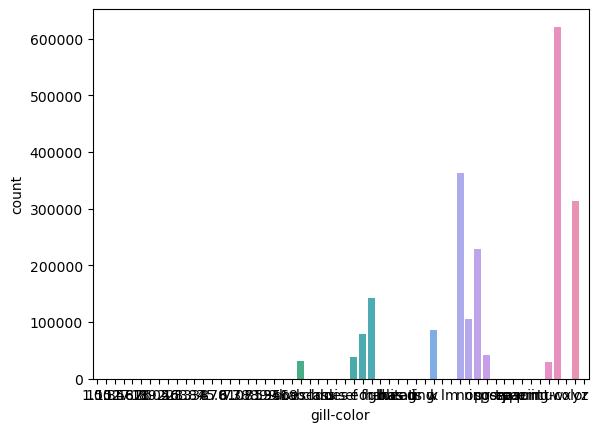

In [62]:
sns.barplot(stats_g_c, x = 'gill-color', y = 'count')

In [63]:
df4['gill-color'] = df4['gill-color'].fillna('w')

In [64]:
df4['gill-color'].unique()

array(['w', 'y', 'n', 'e', 'f', 'b', 'g', 'p', 'o', 'u', 'k', 'r', 'l',
       'd', 'has-ring', 'season', 't', 's', 'a', 'x', 'c', '8.95', 'i',
       '6.3', 'h', '1.55', '19.46', 'spacing', 'z', 'class', '5.01',
       '10.56', '12.87', 'is w', 'does-bruise-or-bleed', '17.26', '18',
       'spore-print-color', 'ring-type', 'does f', '7.07', '3.38', 'm',
       '8.53', '18.05', 'habitat', '2.6', '7.81', 'has g', '9.69', '4',
       '10.34', '21.87', '9.41', '4.78', '2.83'], dtype=object)

In [65]:
def gill_color(df):
    df4['gill_color'] = 'w'
    
    gill_c = ['w', 'y', 'n', 'e', 'f', 'b', 'g', 'p', 'o', 'u', 'k', 'r', 'l',
              'd', 'm', 't', 's', 'a', 'x', 'c', 'i', 'h', 'z']
    for gillc in  gill_c:
        df4.loc[df4['gill-color'] == gillc, 'gill_color'] = gillc
    return df

In [66]:
gill_color(df4)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color
0,3116945,8.64,x,t,n,t,a,c,w,11.13,...,g,d,a,a,t,x,n,t,c,w
1,3116946,6.90,o,t,o,f,a,c,y,1.27,...,f,d,a,a,t,o,o,f,c,y
2,3116947,2.00,b,g,n,f,a,c,n,6.18,...,f,d,s,a,g,b,n,f,c,n
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,z,d,u,s,t,x,n,f,c,n
4,3116949,6.17,x,h,y,f,p,c,y,6.73,...,NaN,d,u,p,h,x,y,f,c,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,f,d,u,a,g,x,w,f,d,w
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,f,g,a,d,s,x,w,f,c,w
2077961,5194906,5.73,x,e,e,f,a,c,w,6.16,...,z,d,a,a,e,x,e,f,c,w
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,f,d,a,a,g,b,n,f,d,g


In [67]:
df4['gill_color'].unique()

array(['w', 'y', 'n', 'e', 'f', 'b', 'g', 'p', 'o', 'u', 'k', 'r', 'l',
       'd', 't', 's', 'a', 'x', 'c', 'i', 'h', 'z', 'm'], dtype=object)

<Axes: >

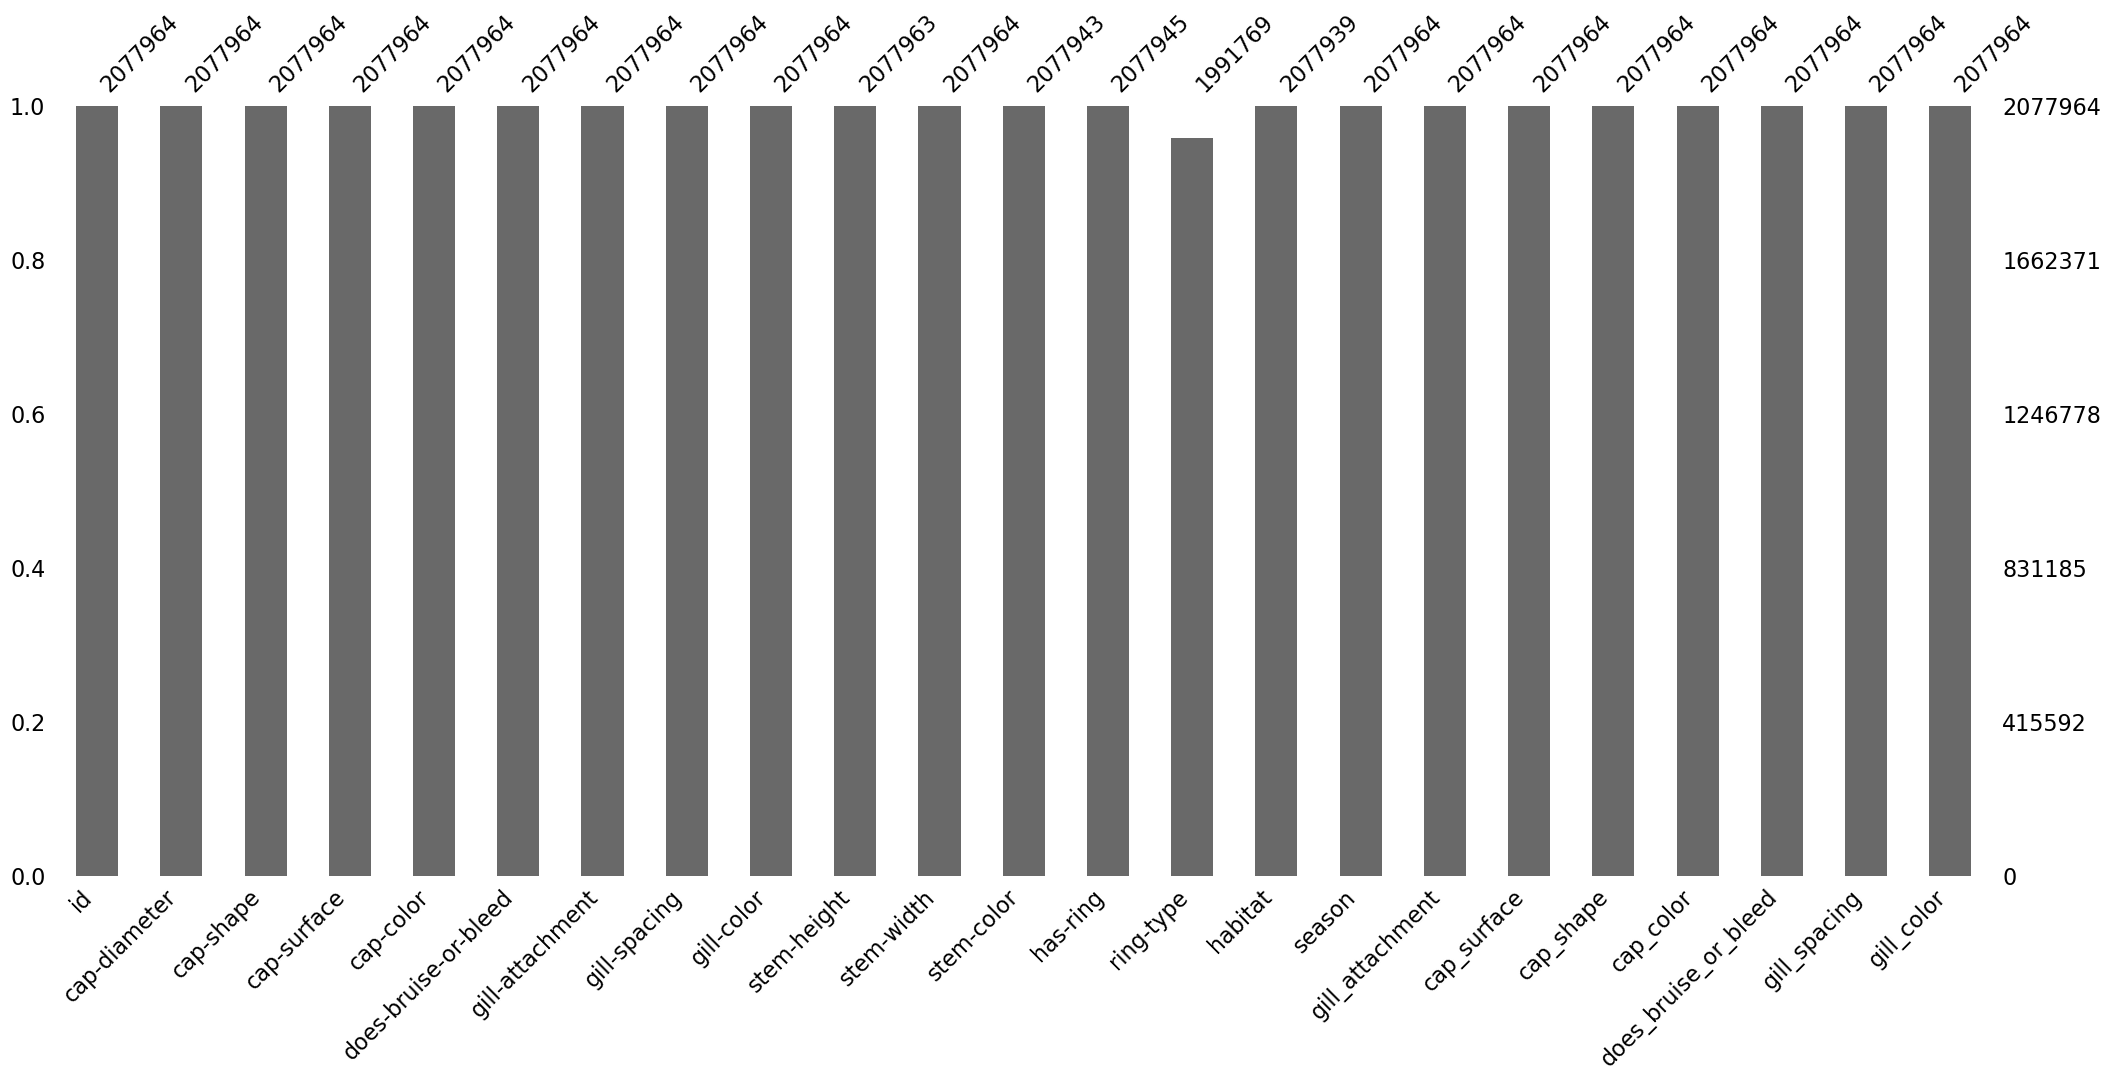

In [68]:
msno.bar(df4)

In [69]:
df4['stem-color'].unique()

array(['w', 'n', 'y', 'g', 'o', 'p', 'u', 'e', 'k', 'r', 'l', 'b', 's',
       'f', nan, 'h', 'x', 'a', '3.05', 't', 'stem-root', 'veil-color',
       'm', 'c', 'd', '7.35', '8.04', '6.58', 'veil-type', '17.16',
       'season', '2.96', '17.49', 'i', 'z', '10.6', '11.31', '5.5',
       'ring-type', '11.0', '8.09', '10.93', '6.67', '6.99', '5.61',
       '6.93', 'does-bruise-or-bleed', '6.28', '2.84', '7.71',
       'spore-print-color', 'class', '3.66', '3.8', 'habitat', '3.02'],
      dtype=object)

In [70]:
stats_s_c = df4.groupby(['stem-color'], as_index = False)[['id']].count()
stats_s_c = stats_s_c.rename(columns = {'id': 'count'})
stats_s_c.sort_values(by = 'count', ascending=False)

,stem-color,count
51,w,797365
38,n,668156
53,y,250141
31,g,88202
39,o,75094
29,e,68804
48,u,44784
40,p,36356
35,k,22176
41,r,14910


<Axes: xlabel='stem-color', ylabel='count'>

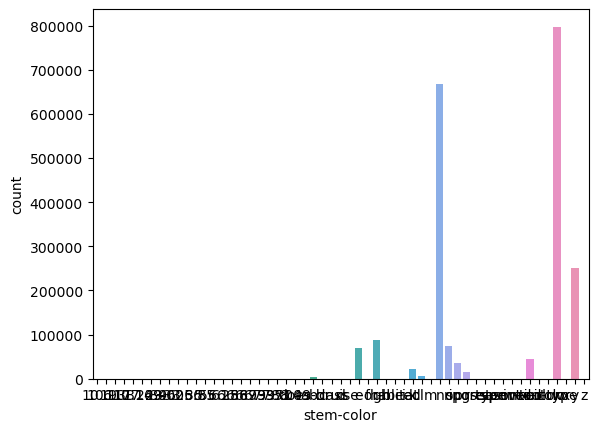

In [71]:
sns.barplot(stats_s_c, x = 'stem-color', y = 'count')

In [72]:
df4['stem-color'] = df4['stem-color'].fillna('w')

In [73]:
def stem_color(df):
    df4['stem_color'] = 'w'
    
    stem_c = ['w', 'y', 'n', 'e', 'f', 'b', 'g', 'p', 'o', 'u', 'k', 'r', 'l',
              'd', 'm', 't', 's', 'a', 'x', 'c', 'i', 'h', 'z']
    for stemc in  stem_c:
        df4.loc[df4['stem-color'] == stemc, 'stem_color'] = stemc
    return df

In [74]:
stem_color(df4)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color
0,3116945,8.64,x,t,n,t,a,c,w,11.13,...,d,a,a,t,x,n,t,c,w,w
1,3116946,6.90,o,t,o,f,a,c,y,1.27,...,d,a,a,t,o,o,f,c,y,n
2,3116947,2.00,b,g,n,f,a,c,n,6.18,...,d,s,a,g,b,n,f,c,n,n
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,d,u,s,t,x,n,f,c,n,w
4,3116949,6.17,x,h,y,f,p,c,y,6.73,...,d,u,p,h,x,y,f,c,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,d,u,a,g,x,w,f,d,w,e
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,g,a,d,s,x,w,f,c,w,w
2077961,5194906,5.73,x,e,e,f,a,c,w,6.16,...,d,a,a,e,x,e,f,c,w,y
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,d,a,a,g,b,n,f,d,g,g


In [75]:
df4['stem_color'].unique()

array(['w', 'n', 'y', 'g', 'o', 'p', 'u', 'e', 'k', 'r', 'l', 'b', 's',
       'f', 'h', 'x', 'a', 't', 'm', 'c', 'd', 'i', 'z'], dtype=object)

In [76]:
df5 = df4.drop(columns =['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed','gill-attachment',
                          'gill-spacing','gill-color', 'stem-color'])

In [77]:
df5.shape

(2077964, 16)

In [78]:
df5['has-ring'].unique()

array(['t', 'f', nan, 'u', 'a', 'c', 'l', 'g', 'i', 'm', 'p', 'r', 'x',
       'y', 'd', 'e', 'z', 'k', 'o', 'h', 'b', 's', 'w', '20.96'],
      dtype=object)

In [79]:
stats_hs = df5.groupby(['has-ring'], as_index = False)[['id']].count()
stats_hs = stats_hs.rename(columns = {'id': 'count'})
stats_hs.sort_values(by = 'count', ascending=False)

,has-ring,count
6,f,1578092
17,t,499759
5,e,14
15,r,11
3,c,9
7,g,9
8,h,8
11,l,5
14,p,5
4,d,5


<Axes: xlabel='has-ring', ylabel='count'>

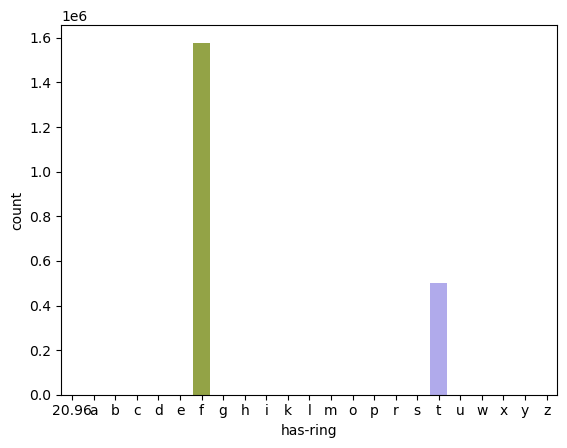

In [80]:
sns.barplot(stats_hs, x = 'has-ring', y = 'count')

In [81]:
df5['has-ring'] = df5['has-ring'].fillna('f')

In [82]:
def has_ring(df):
    df5['has_ring'] = 'f'
    
    has_r = ['t', 'f', 'u', 'a', 'c', 'l', 'g', 'i', 'm', 'p', 'r', 'x',
              'y', 'd', 'e', 'z', 'k', 'o', 'h', 'b', 's', 'w',]
    for ring in  has_r:
        df5.loc[df5['has-ring'] == ring, 'has_ring'] = ring
    return df

In [83]:
has_ring(df5)

,id,cap-diameter,stem-height,stem-width,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring
0,3116945,8.64,11.13,17.12,t,g,d,a,a,t,x,n,t,c,w,w,t
1,3116946,6.90,1.27,10.75,f,f,d,a,a,t,o,o,f,c,y,n,f
2,3116947,2.00,6.18,3.14,f,f,d,s,a,g,b,n,f,c,n,n,f
3,3116948,3.47,4.98,8.51,t,z,d,u,s,t,x,n,f,c,n,w,t
4,3116949,6.17,6.73,13.70,t,NaN,d,u,p,h,x,y,f,c,y,y,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,2.67,1.35,f,f,d,u,a,g,x,w,f,d,w,e,f
2077960,5194905,3.12,2.69,7.38,f,f,g,a,d,s,x,w,f,c,w,w,f
2077961,5194906,5.73,6.16,9.74,t,z,d,a,a,e,x,e,f,c,w,y,t
2077962,5194907,5.03,6.00,3.46,f,f,d,a,a,g,b,n,f,d,g,g,f


In [84]:
df5['has-ring'].unique()

array(['t', 'f', 'u', 'a', 'c', 'l', 'g', 'i', 'm', 'p', 'r', 'x', 'y',
       'd', 'e', 'z', 'k', 'o', 'h', 'b', 's', 'w', '20.96'], dtype=object)

In [85]:
stats_rt = df5.groupby(['ring-type'], as_index =False)[['id']].count()
stats_rt = stats_rt.rename(columns = {'id': 'count'})
stats_rt.sort_values(by = 'count', ascending=False)

,ring-type,count
14,f,1650200
13,e,80348
35,z,75917
20,l,48847
24,p,45654
25,r,45400
15,g,42472
21,m,2689
30,t,46
11,d,24


In [86]:
df5['ring-type'] = df5['ring-type'].fillna('f')

In [87]:
df5['ring-type'].unique()

array(['g', 'f', 'z', 'r', 'e', 'l', 'p', 'm', 'd', 'n', 'u', 's',
       'season', 'k', 't', 'a', 'y', 'o', 'c', 'w', '1', 'x', 'b', 'h',
       'ring-type', 'i', '3.48', 'is p', '12.63', '10.36', '8.12',
       'does f', '18.5', '9.33', 'spore-print-color', '2'], dtype=object)

In [88]:
def ring_type(df):
    df5['ring_type'] = 'f'
    
    has_r = ['g', 'f', 'z', 'r', 'e', 'l', 'p', 'm', 'd', 'n', 'u', 's',
             'k', 't', 'a', 'y', 'o', 'c', 'w', 'x', 'b', 'h', 'i']
    for ring in  has_r:
        df5.loc[df5['ring-type'] == ring, 'ring_type'] = ring
    return df

In [89]:
ring_type(df5)

,id,cap-diameter,stem-height,stem-width,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type
0,3116945,8.64,11.13,17.12,t,g,d,a,a,t,x,n,t,c,w,w,t,g
1,3116946,6.90,1.27,10.75,f,f,d,a,a,t,o,o,f,c,y,n,f,f
2,3116947,2.00,6.18,3.14,f,f,d,s,a,g,b,n,f,c,n,n,f,f
3,3116948,3.47,4.98,8.51,t,z,d,u,s,t,x,n,f,c,n,w,t,z
4,3116949,6.17,6.73,13.70,t,f,d,u,p,h,x,y,f,c,y,y,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,2.67,1.35,f,f,d,u,a,g,x,w,f,d,w,e,f,f
2077960,5194905,3.12,2.69,7.38,f,f,g,a,d,s,x,w,f,c,w,w,f,f
2077961,5194906,5.73,6.16,9.74,t,z,d,a,a,e,x,e,f,c,w,y,t,z
2077962,5194907,5.03,6.00,3.46,f,f,d,a,a,g,b,n,f,d,g,g,f,f


In [90]:
df5['ring_type'].unique()

array(['g', 'f', 'z', 'r', 'e', 'l', 'p', 'm', 'd', 'n', 'u', 's', 'k',
       't', 'a', 'y', 'o', 'c', 'w', 'x', 'b', 'h', 'i'], dtype=object)

In [91]:
stats_hb = df5.groupby(['habitat'], as_index =False)[['id']].count()
stats_hb = stats_hb.rename(columns = {'id': 'count'})
stats_hb.sort_values(by = 'count', ascending=False)

,habitat,count
16,d,1450420
19,g,304300
25,l,114458
26,m,101258
20,h,80032
35,w,12324
29,p,11429
34,u,3434
31,s,39
33,t,35


In [92]:
df5['habitat'] = df5['habitat'].fillna('d')

In [93]:
df5['habitat'].unique()

array(['d', 'p', 'u', 'g', 'h', 'm', 'l', 'w', 's', 't', 'habitat', 'k',
       'n', 'x', 'o', 'e', 'a', 'spore-print-color', 'class', 'c', 'b',
       'y', 'r', '4.58', '4.76', 'has-ring', '19.85', 'f', '2.53', '9.01',
       '2.02', '5.84', '7.01', 'i', '5.92', '5.83', 'z', '1.75', '3.19'],
      dtype=object)

In [94]:
def habitat(df):
    df5['habitat_c'] = 'd'
    
    hab_l = ['d', 'p', 'u', 'g', 'h', 'm', 'l', 'w', 's', 't', 'k', 'n', 'x', 'o', 'e', 'a', 'c', 'b',
             'y', 'r', 'f', 'i', 'z']
    for hab in  hab_l:
        df5.loc[df5['habitat'] == hab, 'habitat_c'] = hab
    return df

In [95]:
habitat(df5)

,id,cap-diameter,stem-height,stem-width,has-ring,ring-type,habitat,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type,habitat_c
0,3116945,8.64,11.13,17.12,t,g,d,a,a,t,x,n,t,c,w,w,t,g,d
1,3116946,6.90,1.27,10.75,f,f,d,a,a,t,o,o,f,c,y,n,f,f,d
2,3116947,2.00,6.18,3.14,f,f,d,s,a,g,b,n,f,c,n,n,f,f,d
3,3116948,3.47,4.98,8.51,t,z,d,u,s,t,x,n,f,c,n,w,t,z,d
4,3116949,6.17,6.73,13.70,t,f,d,u,p,h,x,y,f,c,y,y,t,f,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,2.67,1.35,f,f,d,u,a,g,x,w,f,d,w,e,f,f,d
2077960,5194905,3.12,2.69,7.38,f,f,g,a,d,s,x,w,f,c,w,w,f,f,g
2077961,5194906,5.73,6.16,9.74,t,z,d,a,a,e,x,e,f,c,w,y,t,z,d
2077962,5194907,5.03,6.00,3.46,f,f,d,a,a,g,b,n,f,d,g,g,f,f,d


In [96]:
df5['habitat_c'].unique()

array(['d', 'p', 'u', 'g', 'h', 'm', 'l', 'w', 's', 't', 'k', 'n', 'x',
       'o', 'e', 'a', 'c', 'b', 'y', 'r', 'f', 'i', 'z'], dtype=object)

In [97]:
df5['season'].unique()

array(['a', 's', 'u', 'w'], dtype=object)

In [98]:
df5['stem-height'].max()

57.29

In [99]:
df5['stem-height'] = df5['stem-height'].fillna(df['stem-height'].mean())

In [100]:
df5.groupby(['stem-height'], as_index = False)[['id']].count()

,stem-height,id
0,0.00,333
1,0.92,1
2,0.97,3
3,1.00,2
4,1.01,1
...,...,...
2660,50.22,1
2661,50.40,1
2662,50.42,1
2663,53.24,2


In [150]:
df6 = df5.drop(columns = ['has-ring', 'ring-type', 'habitat'])

In [151]:
df6.isnull().sum()

id                      0
cap-diameter            0
stem-height             0
stem-width              0
season                  0
gill_attachment         0
cap_surface             0
cap_shape               0
cap_color               0
does_bruise_or_bleed    0
gill_spacing            0
gill_color              0
stem_color              0
has_ring                0
ring_type               0
habitat_c               0
dtype: int64

In [152]:
df6 = df6.drop(columns = ['id'])

In [153]:
df6.head()

,cap-diameter,stem-height,stem-width,season,gill_attachment,cap_surface,cap_shape,cap_color,does_bruise_or_bleed,gill_spacing,gill_color,stem_color,has_ring,ring_type,habitat_c
0,8.64,11.13,17.12,a,a,t,x,n,t,c,w,w,t,g,d
1,6.90,1.27,10.75,a,a,t,o,o,f,c,y,n,f,f,d
2,2.00,6.18,3.14,s,a,g,b,n,f,c,n,n,f,f,d
3,3.47,4.98,8.51,u,s,t,x,n,f,c,n,w,t,z,d
4,6.17,6.73,13.70,u,p,h,x,y,f,c,y,y,t,f,d


In [154]:
with open('mushrooms-1.pkl', 'rb') as file:
    model = pickle.load(file)

In [170]:
predict = model.predict(df6)

In [171]:
predict

array([0, 1, 1, ..., 1, 0, 0])

In [189]:
df_predict = pd.DataFrame({'class': predict})

In [190]:
df_predict

,class
0,0
1,1
2,1
3,1
4,0
...,...
2077959,1
2077960,1
2077961,1
2077962,0


In [197]:
df_predict['class'] = df_predict['class'].replace({0:'e'}).replace({1:'p'})

In [198]:
df_predict

,class
0,e
1,p
2,p
3,p
4,e
...,...
2077959,p
2077960,p
2077961,p
2077962,e


In [199]:
id_predict = pd.concat([df5['id'], df_predict], axis = 1)

In [200]:
id_predict

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


In [202]:
id_predict.to_csv('answer.csv', encoding='utf-8', index = False)